In [1]:
import numpy as np
import scipy
import scipy.constants as const
import matplotlib.pyplot as plt
import importlib
import bokeh.plotting as bplt

## Ideal case: infinite transmission bandwidth & infinite reception bandwidth

<IPython.core.display.Javascript object>


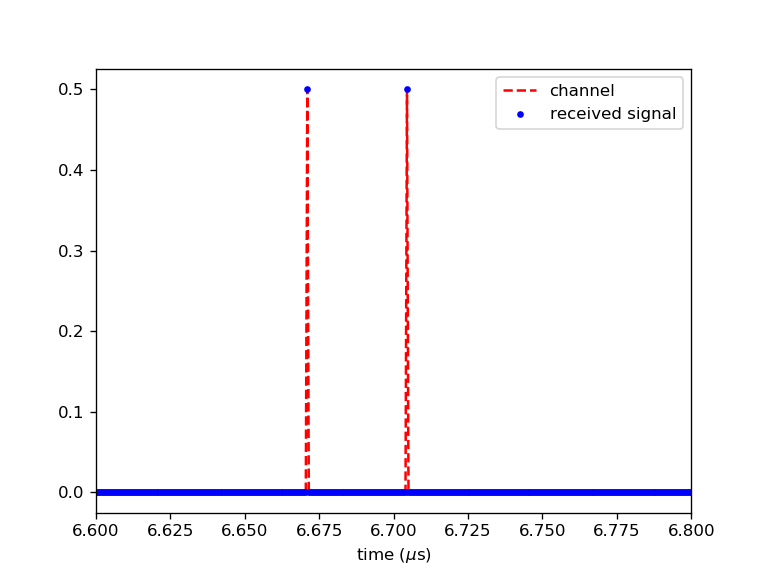

In [2]:
%matplotlib notebook

try:
    importlib.reload(chtools)
except NameError:
    import chtools


def simInfiniteBandwidth():
    # simulation parameters
    fs = 2e9  # sampling freq
    Ts = 1/fs  # sampling time
    tStart = 0.0
    tEnd = 1e-3
    t = np.arange(tStart, tEnd, Ts)
    n = t.shape[0]
    f = np.fft.fftfreq(n, d=Ts)
    
    d1 = 2000.0  # direct path distance
    d2 = 2010.0  # reflection distance
    
    x = np.array([0., 1., 0.])  # wideband delta is transmitted
    
    # simulate channel (noiseless)
    h = np.zeros(t.shape, dtype='complex_')  # variable for channel response (time domain)
    chtools.addResponse(h, d1, 0.5, Ts)
    chtools.addResponse(h, d2, 0.5, Ts)

    y = np.convolve(x, h, mode='same')
    
    plt.figure()
    plt.plot(1e6*t, np.abs(h), 'r--', label='channel')
    plt.plot(1e6*t, np.abs(y), 'b.', label='received signal')
    plt.xlabel("time ($\mu$s)")
    plt.xlim(6.6, 6.8)
    plt.legend()
    
simInfiniteBandwidth()
# plt.savefig("figures/infTXinfRX.png", format='png')
plt.show()


## Receiver is band limited

<IPython.core.display.Javascript object>


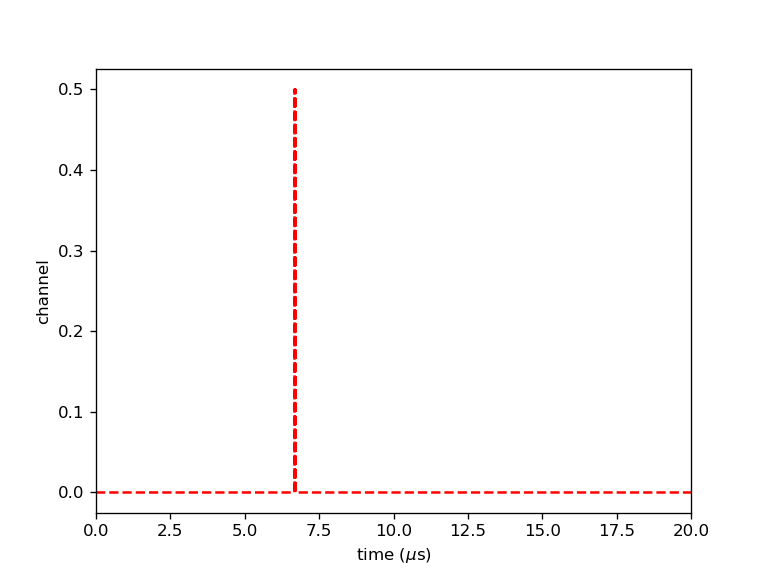

<IPython.core.display.Javascript object>


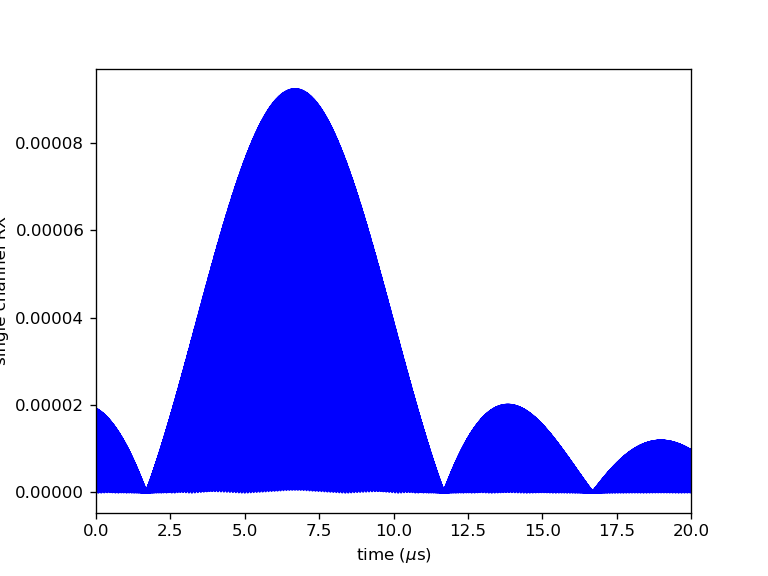

<IPython.core.display.Javascript object>


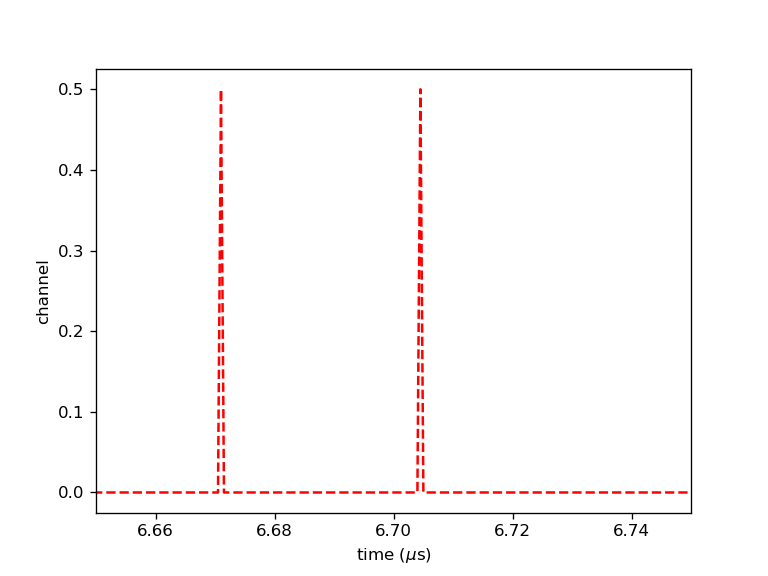

<IPython.core.display.Javascript object>


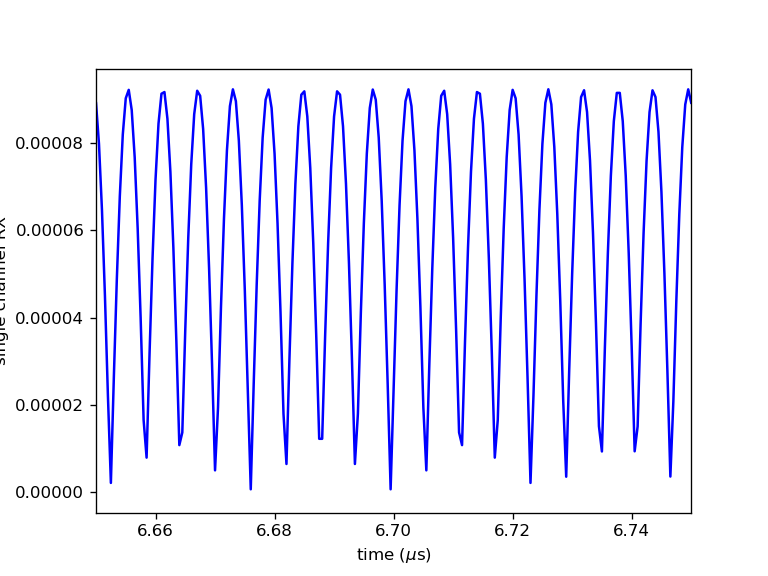

In [3]:
%matplotlib notebook

try:
    importlib.reload(chtools)
except NameError:
    import chtools


def infTxLimitedRx():
    # simulation parameters
    fs = 2e9  # sampling freq
    Ts = 1/fs  # sampling time
    tStart = 0.0
    tEnd = 1e-3
    t = np.arange(tStart, tEnd, Ts)
    n = t.shape[0]
    f = np.fft.fftfreq(n, d=Ts)
    
    d1 = 2000.0  # direct path distance
    d2 = 2010.0  # reflection distance
    
    x = np.array([0., 1., 0.])  # wideband delta is transmitted
    
    # simulate channel (noiseless)
    h = np.zeros(t.shape, dtype='complex_')  # variable for channel response (time domain)
    chtools.addResponse(h, d1, 0.5, Ts)
    chtools.addResponse(h, d2, 0.5, Ts)

    y = np.convolve(x, h, mode='same')
    yFilt = chtools.idealBandpass(y, fc=915e6, bw=200e3, fs=fs)
    
    plt.figure()
    plt.plot(1e6*t, np.abs(h), 'r--', label='channel')
    plt.xlabel("time ($\mu$s)")
    plt.ylabel("channel")
    plt.xlim(0.0, 20.0)
#     plt.savefig("figures/infTXlimitedRX_channel.png", format='png')
    
    plt.figure()
    plt.plot(1e6*t, np.abs(yFilt), 'b-', label='single channel RX')
    plt.xlabel("time ($\mu$s)")
    plt.ylabel("single channel RX")
    plt.xlim(0.0, 20.0)
#     plt.savefig("figures/infTXlimitedRX_received.png", format='png')
    
    plt.figure()
    plt.plot(1e6*t, np.abs(h), 'r--', label='channel')
    plt.xlabel("time ($\mu$s)")
    plt.ylabel("channel")
    plt.xlim(6.65, 6.75)
#     plt.savefig("figures/infTXlimitedRX_channel-zoom.png", format='png')
    
    plt.figure()
    plt.plot(1e6*t, np.abs(yFilt), 'b-', label='single channel RX')
    plt.xlabel("time ($\mu$s)")
    plt.ylabel("single channel RX")
    plt.xlim(6.65, 6.75)
#     plt.savefig("figures/infTXlimitedRX_received-zoom.png", format='png')
    
infTxLimitedRx()
plt.show()


## infinite transmit bandwidth but RX bandwidth is limited to a few channels

<IPython.core.display.Javascript object>


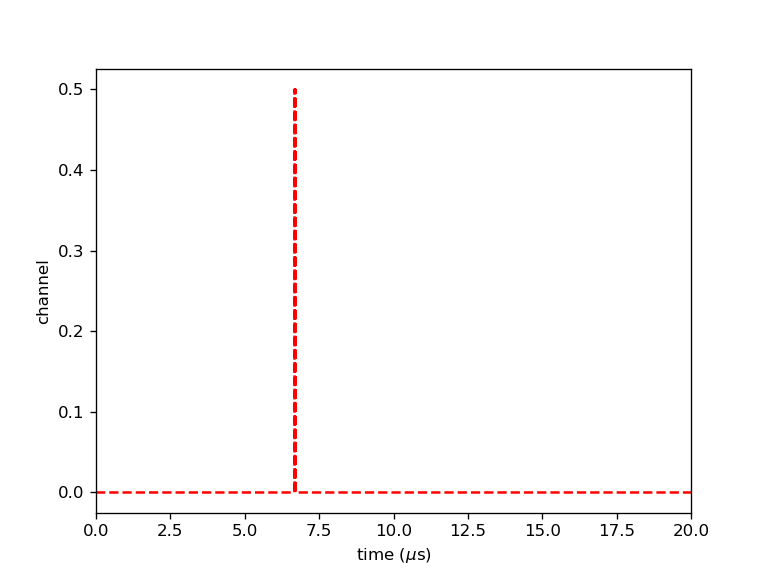

<IPython.core.display.Javascript object>


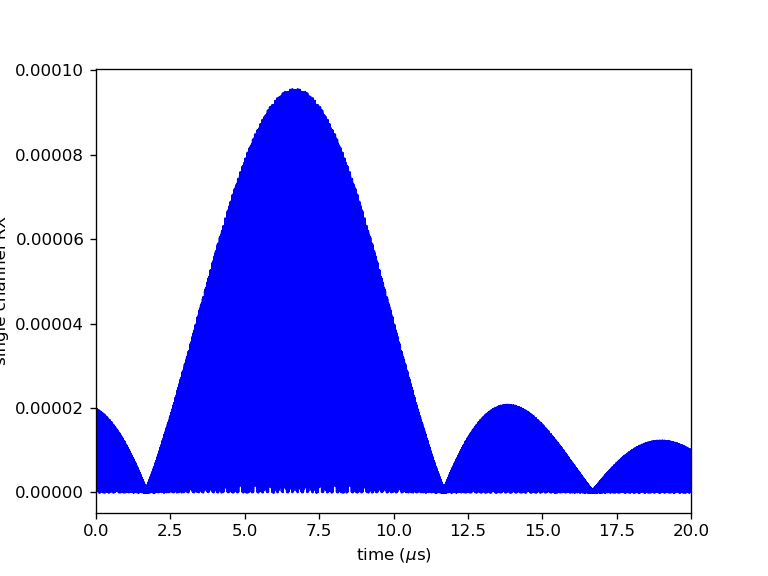

<IPython.core.display.Javascript object>


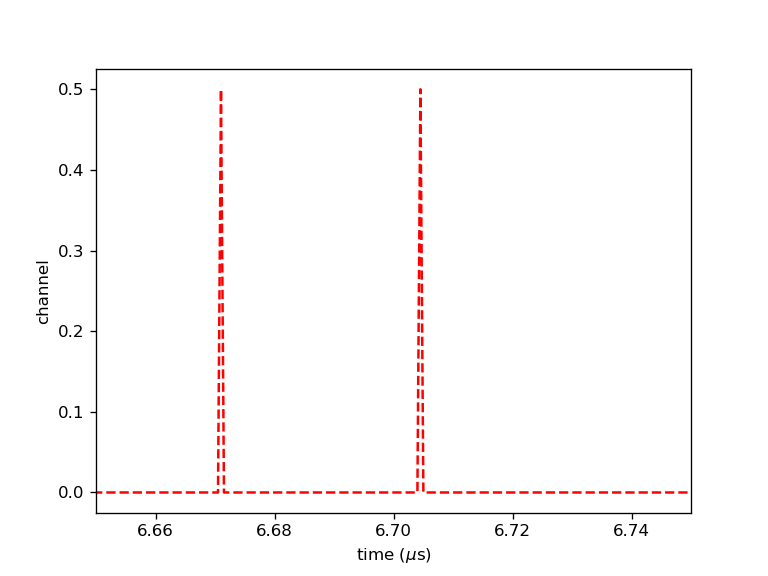

<IPython.core.display.Javascript object>


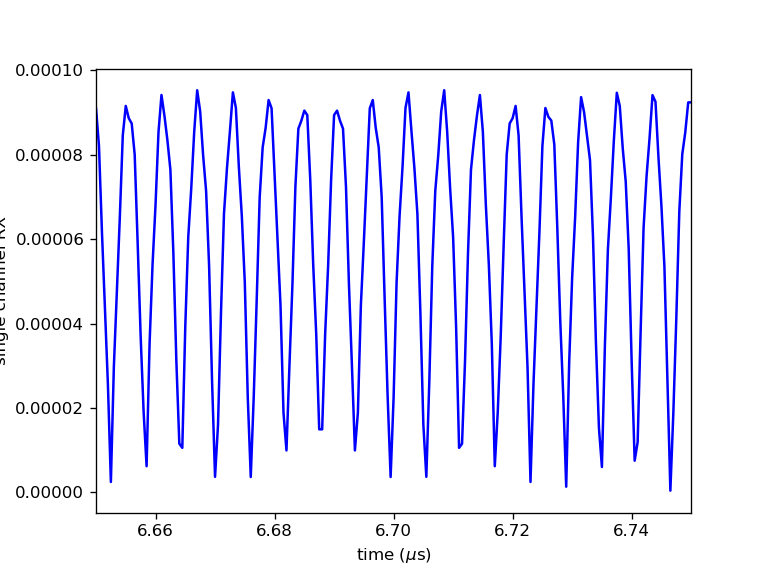

In [3]:
%matplotlib notebook

try:
    importlib.reload(chtools)
except NameError:
    import chtools


def infTxMultibandRx():
    # simulation parameters
    fs = 2e9  # sampling freq
    Ts = 1/fs  # sampling time
    tStart = 0.0
    tEnd = 1e-3
    t = np.arange(tStart, tEnd, Ts)
    n = t.shape[0]
    f = np.fft.fftfreq(n, d=Ts)
    
    d1 = 2000.0  # direct path distance
    d2 = 2010.0  # reflection distance
    
    x = np.array([0., 1., 0.])  # wideband delta is transmitted
    
    # simulate channel (noiseless)
    h = np.zeros(t.shape, dtype='complex_')  # variable for channel response (time domain)
    chtools.addResponse(h, d1, 0.5, Ts)
    chtools.addResponse(h, d2, 0.5, Ts)

    y = np.convolve(x, h, mode='same')
    yFilt = chtools.idealMultipass(y, fcList=[433e6, 915e6], bw=200e3, fs=fs)
    
    plt.figure()
    plt.plot(1e6*t, np.abs(h), 'r--', label='channel')
    plt.xlabel("time ($\mu$s)")
    plt.ylabel("channel")
    plt.xlim(0.0, 20.0)
#     plt.savefig("figures/infTXmultipassRX_channel.png", format='png')
    
    plt.figure()
    plt.plot(1e6*t, np.abs(yFilt), 'b-', label='single channel RX')
    plt.xlabel("time ($\mu$s)")
    plt.ylabel("single channel RX")
    plt.xlim(0.0, 20.0)
#     plt.savefig("figures/infTXmultipassRX_received.png", format='png')
    
    plt.figure()
    plt.plot(1e6*t, np.abs(h), 'r--', label='channel')
    plt.xlabel("time ($\mu$s)")
    plt.ylabel("channel")
    plt.xlim(6.65, 6.75)
#     plt.savefig("figures/infTXmultipassRX_channel-zoom.png", format='png')
    
    plt.figure()
    plt.plot(1e6*t, np.abs(yFilt), 'b-', label='single channel RX')
    plt.xlabel("time ($\mu$s)")
    plt.ylabel("single channel RX")
    plt.xlim(6.65, 6.75)
#     plt.savefig("figures/infTXmultipassRX_received-zoom.png", format='png')
    
infTxMultibandRx()
plt.show()


## how does frequency selection affect multipath resolution?

In [ ]:
%matplotlib notebook

try:
    importlib.reload(chtools)
except NameError:
    import chtools


def multibandRXSelectiveFreq():
    # simulation parameters
    fs = 2e9  # sampling freq
    Ts = 1/fs  # sampling time
    tStart = 0.0
    tEnd = 1e-3
    t = np.arange(tStart, tEnd, Ts)
    n = t.shape[0]
    f = np.fft.fftfreq(n, d=Ts)
    
    d1 = 2000.0  # direct path distance
    d2 = 2010.0  # reflection distance
    
    x = np.array([0., 1., 0.])  # wideband delta is transmitted
    
    # simulate channel (noiseless)
    h = np.zeros(t.shape, dtype='complex_')  # variable for channel response (time domain)
    chtools.addResponse(h, d1, 0.5, Ts)
    chtools.addResponse(h, d2, 0.5, Ts)

    y = np.convolve(x, h, mode='same')
    yFilt1 = chtools.idealMultipass(y, fcList=[433e6, 915e6], bw=200e3, fs=fs)
    yFilt2 = chtools.idealMultipass(y, fcList=[600e6, 915e6], bw=200e3, fs=fs)
        
    plt.figure()
    plt.plot(1e6*t, np.abs(h), 'r--')
    plt.xlabel("time ($\mu$s)")
    plt.ylabel("channel")
    plt.xlim(6.65, 6.75)
#     plt.xlim(6.0, 7.5)
    plt.savefig("figures/multipassRX_freqDependence-channel.png", format='png')
    
    plt.figure()
    plt.plot(1e6*t, np.abs(yFilt2), 'r-', label="600, 915 Mhz")
    plt.plot(1e6*t, np.abs(yFilt1), 'b-', label="433, 915 Mhz")
    plt.xlabel("time ($\mu$s)")
    plt.legend()
    plt.xlim(6.65, 6.75)
#     plt.xlim(6.0, 7.5)
    plt.savefig("figures/multipassRX_freqDependence.png", format='png')
    
multibandRXSelectiveFreq()
plt.show()


## Does oversampling help?

Send a band limited signal but oversample it on the receiver. Can we get a better time resolution if we oversample it?

(50,)


<IPython.core.display.Javascript object>


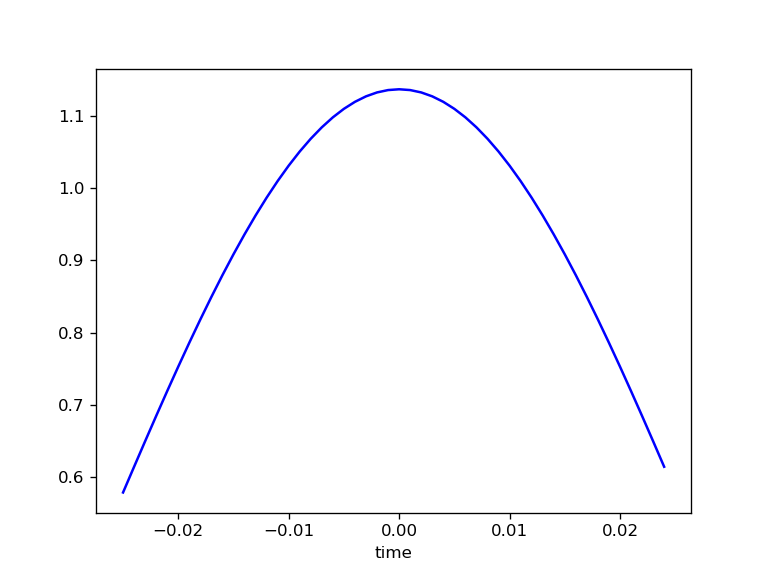

In [14]:
import commpy.filters as filters

# create a band limited pulse
fs = 1e3
Ts = 1/fs
n = 50
t = np.arange(-Ts*(n//2), Ts*(n//2), Ts)
print(t.shape)

# note Ts is symbol rate in rrcosfilter function
t, x = filters.rrcosfilter(N=n, alpha=0.5, Ts=1, Fs=fs)

plt.figure()
plt.plot(t, x, 'b-')
plt.xlabel("time")
plt.show()

# rt = t/Ts
# alpha = 0.5
# q = np.sinc(rt)*np.cos(np.pi*alpha*rt)/(1 - (2*alpha*rt)**2)
# plt.figure()
# plt.plot(t, q, 'b.')
# plt.xlabel("time")

# Q_f = np.fft.fft(q)
# f = np.fft.fftfreq(n, d=Ts)
# plt.figure()
# plt.plot(f, np.abs(Q_f), 'r.')
# plt.xlabel("freq")

# plt.show()

In [ ]:
%matplotlib notebook

try:
    importlib.reload(chtools)
except NameError:
    import chtools


def multibandRXSelectiveFreq():
    # simulation parameters
    fs = 2e9  # sampling freq
    Ts = 1/fs  # sampling time
    tStart = 0.0
    tEnd = 1e-3
    t = np.arange(tStart, tEnd, Ts)
    n = t.shape[0]
    f = np.fft.fftfreq(n, d=Ts)
    
    d1 = 2000.0  # direct path distance
    d2 = 2010.0  # reflection distance
    
    x = np.array([0., 1., 0.])  # wideband delta is transmitted
    
    # simulate channel (noiseless)
    h = np.zeros(t.shape, dtype='complex_')  # variable for channel response (time domain)
    chtools.addResponse(h, d1, 0.5, Ts)
    chtools.addResponse(h, d2, 0.5, Ts)

    y = np.convolve(x, h, mode='same')
    yFilt1 = chtools.idealMultipass(y, fcList=[433e6, 915e6], bw=200e3, fs=fs)
    yFilt2 = chtools.idealMultipass(y, fcList=[600e6, 915e6], bw=200e3, fs=fs)
        
    plt.figure()
    plt.plot(1e6*t, np.abs(h), 'r--')
    plt.xlabel("time ($\mu$s)")
    plt.ylabel("channel")
    plt.xlim(6.65, 6.75)
#     plt.xlim(6.0, 7.5)
    plt.savefig("figures/multipassRX_freqDependence-channel.png", format='png')
    
    plt.figure()
    plt.plot(1e6*t, np.abs(yFilt2), 'r-', label="600, 915 Mhz")
    plt.plot(1e6*t, np.abs(yFilt1), 'b-', label="433, 915 Mhz")
    plt.xlabel("time ($\mu$s)")
    plt.legend()
    plt.xlim(6.65, 6.75)
#     plt.xlim(6.0, 7.5)
    plt.savefig("figures/multipassRX_freqDependence.png", format='png')
    
multibandRXSelectiveFreq()
plt.show()


# Testing bokeh plots

In [ ]:
def saveBokehPlot(t, h, title):
    bplt.output_file(title + "_amp.html")
    pAmp = bplt.figure(
        tools = "pan,xwheel_zoom,tap,reset",
        title = title + " (amplitude)",
        x_axis_label='dist',
        y_axis_label='amplitude',
        x_range = (9990, 10030)
    )
    pAmp.circle(const.c*t, np.abs(h), legend_label="magnitude")
    bplt.save(pAmp)
    
    bplt.output_file(title + "_phase.html")
    pPhase = bplt.figure(
        tools = "pan,xwheel_zoom,tap,reset",
        title = title + " (phase)",
        x_axis_label='dist',
        y_axis_label='phase',
        x_range = (9990, 10030)
    )
    pPhase.circle(const.c*t, np.angle(h), legend_label="angle")
    bplt.save(pPhase)

saveBokehPlot(t, h, "rawChannel")
saveBokehPlot(t, hFilt, "bandpassChannel")
saveBokehPlot(t, hMulti, "multipassChannel")

In [ ]:
# try to add a hover tool
bplt.output_notebook()
p.figure = bplt.figure()

In [ ]:
try:
    importlib.reload(chtools)
except NameError:
    import chtools
    
bplt.output_notebook()

fs = 1e9
n = 50
H_f = np.ones(n,dtype='complex_')
h = np.fft.ifft(H_f)
H_f = np.fft.fft(h)

h_filt = chtools.idealBandPass(h, fc=2.5e8, bw=1e8, fs=fs)
H_filt_f = np.fft.fft(h_filt)


p = bplt.figure(
   tools="pan,xwheel_zoom,reset,save",
   title="raw channel response",
   x_axis_label='time', y_axis_label='value'
)

t = np.arange(n)*(1/fs)
p.line(t, np.abs(h), legend_label="response", color='blue')
p.line(t, np.abs(h_filt), legend_label='filtered', color='red')

p2 = bplt.figure(
    tools="pan,xwheel_zoom,reset,save",
    title="channel frequency response",
    x_axis_label='freq', y_axis_label='mag'
)

f = np.fft.fftfreq(n, 1/fs)
p2.circle(f, np.abs(H_f), legend_label="unfiltered", color='blue')
p2.triangle(f, np.abs(H_filt_f), legend_label="filtered", color='red')

bplt.show(p)
bplt.show(p2)

In [ ]:


p2 = bplt.figure(
   tools="pan,xwheel_zoom,reset,save",
   title="raw channel response",
   x_axis_label='time', y_axis_label='value'
)

p2.line(t, np.abs(h), legend_label="filtered response")

bplt.show(p2)

## Unit Tests

Everything after this is sort of a unit test for various library functions

In [ ]:
def testConvolution():
    x = np.array([0,1,2,1,0], dtype='complex_')
    h = np.zeros(100, dtype='complex_')
    h[22] = 1.0
    h[25] = 0.3
    y = np.convolve(h, x, mode='same')
    plt.figure()
    plt.plot(np.abs(h), 'b-')
    plt.plot(np.abs(y), 'r-')
    
testConvolution()
plt.show()

In [ ]:
try:
    importlib.reload(chtools)
except NameError:
    import chtools

def testExtractSamples():
    t = np.arange(0,1,1e-3)
    x = np.sin(2*np.pi*10*t)

    tWindow, xWindow = chtools.extractSamples(t, x, [0, 0.02])
    print(tWindow.shape, xWindow.shape)
    
testExtractSamples()

In [ ]:
%matplotlib notebook

try:
    importlib.reload(chtools)
except NameError:
    import chtools
    
def unitTest():
    # bandpass filter test
    fs = 1e4
    n = 1000
    
    def lowpassFilter():
        H = chtools.idealLowpassFilter_fdomain(n, bw=1e3, fs=fs)
        f = np.fft.fftfreq(n, d=1/fs)
        plt.figure()
        plt.plot(f, np.abs(H), 'b.')
        plt.xlabel("freq")
        plt.ylabel("amplitude")
        plt.title("create ideal lowpass filter")
    
    # test creating an ideal lowpass filter
    # lowpassFilter()
    
    def lowpassFiltering():
        # take a signal with two frequencies, plot the before and after
        # filtering waveforms
        fc1 = 4e2
        fc2 = 4e3
        fCutoff = 1e3
        Ts = 1/fs
        t = np.arange(0, n*Ts, Ts)
        f = np.fft.fftfreq(n, d=Ts)
        
        x = np.cos(2*np.pi*fc1*t) + np.cos(2*np.pi*fc2*t)
        X_f = np.fft.fft(x) # before filtering
        xFilt = chtools.idealLowpass(x, bw=fCutoff, fs=fs)
        XFilt_f = np.fft.fft(xFilt)
        
        plt.figure()
        plt.plot(f, np.abs(X_f), 'b.', label="before filtering")
        plt.plot(f, np.abs(XFilt_f), 'r+', label="after filtering")        
        plt.xlabel("freq")
        plt.legend()

    # test low-pass filtering an actual signal
    # lowpassFiltering()
    
    # the conjugate vs flip argument was wrong
    def conjugateVsFlip():
        fc = 4e3
        Ts = 1/fs
        t = np.arange(0, n*Ts, Ts)
        f = np.fft.fftfreq(n, d=Ts)
        
        x = np.sin(2*np.pi*fc*t)
        X_f = np.fft.fft(x) # before conj
        xConj = np.conj(x)
        XConj_f = np.fft.fft(xConj)
        
        plt.figure()
        plt.plot(f, np.real(X_f), 'b.', label="real")
        plt.plot(f, np.imag(X_f), 'rx', label="imag")
        plt.title("before conj")
        plt.xlabel("freq")
        plt.legend()
        
        plt.figure()
        plt.plot(f, np.real(XConj_f), 'b.', label="real")
        plt.plot(f, np.imag(XConj_f), 'rx', label="imag")
        plt.title("after conj")
        plt.xlabel("freq")
        plt.legend()
        
    # test if taking a conjugate is equivalent to flipping the signal
    # conjugateVsFlip()
    # NOTE: there is no good way of flipping 
    
    # creating a low-pass delta function
    def bandLimitedDelta():
        Ts = 1/fs
        t = np.arange(0, n*Ts, Ts)
        f = np.fft.fftfreq(n, d=Ts)
        
        x = np.zeros(n)
        x[n//2] = 1.0
        X_f = np.fft.fft(x)
        xFilt = chtools.idealLowpass(x, 1e3, fs)
        XFilt_f = np.fft.fft(xFilt)
        
        plt.figure()
        plt.plot(t, np.abs(x), 'b-', label="original")
        plt.plot(t, np.abs(xFilt), 'r-', label="LPF")
        plt.xlabel("time")
        plt.legend()
        
        plt.figure()
        plt.plot(f, np.abs(X_f), 'b.')
        plt.xlabel("freq")
        plt.ylabel("magnitude")
        
        plt.figure()
        plt.plot(f, np.abs(XFilt_f), 'b.')
        plt.xlabel("freq")
        plt.ylabel("magnitude")

    bandLimitedDelta()
    
    plt.show()

unitTest()